<a href="https://colab.research.google.com/github/abosedealli/SIT723UNIT_STOCK_-PREDICTION_AR_ARIMA_LSTM_LR-/blob/main/AutoReg_APPLE_adjusted_close.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from ast import Module
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import ar_select_order


df =pd.read_csv('/content/AAPL.dataset.csv')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,15/12/1980,0.122210,0.122210,0.121652,0.121652,0.094663,175884800
1,16/12/1980,0.113281,0.113281,0.112723,0.112723,0.087715,105728000
2,17/12/1980,0.115513,0.116071,0.115513,0.115513,0.089886,86441600
3,18/12/1980,0.118862,0.119420,0.118862,0.118862,0.092492,73449600
4,19/12/1980,0.126116,0.126674,0.126116,0.126116,0.098137,48630400
...,...,...,...,...,...,...,...
10609,12/01/2023,133.880005,134.259995,131.440002,133.410004,133.410004,71379600
10610,13/01/2023,132.029999,134.919998,131.660004,134.759995,134.759995,57758000
10611,17/01/2023,134.830002,137.289993,134.130005,135.940002,135.940002,63646600
10612,18/01/2023,136.820007,138.610001,135.029999,135.210007,135.210007,69672800


In [ ]:
date=df['Date']
date

0        15/12/1980
1        16/12/1980
2        17/12/1980
3        18/12/1980
4        19/12/1980
            ...    
10609    12/01/2023
10610    13/01/2023
10611    17/01/2023
10612    18/01/2023
10613    19/01/2023
Name: Date, Length: 10614, dtype: object

In [ ]:
a_df=df['Adj Close']

In [ ]:
a_df.describe()

count    10614.000000
mean        15.938015
std         35.020572
min          0.038213
25%          0.237927
50%          0.404036
75%         13.993164
max        180.959732
Name: Adj Close, dtype: float64

In [ ]:
df['Date']

0        15/12/1980
1        16/12/1980
2        17/12/1980
3        18/12/1980
4        19/12/1980
            ...    
10609    12/01/2023
10610    13/01/2023
10611    17/01/2023
10612    18/01/2023
10613    19/01/2023
Name: Date, Length: 10614, dtype: object

In [ ]:
from statsmodels.tsa.stattools import adfuller
df_stationarityTest=adfuller(a_df,autolag='AIC')

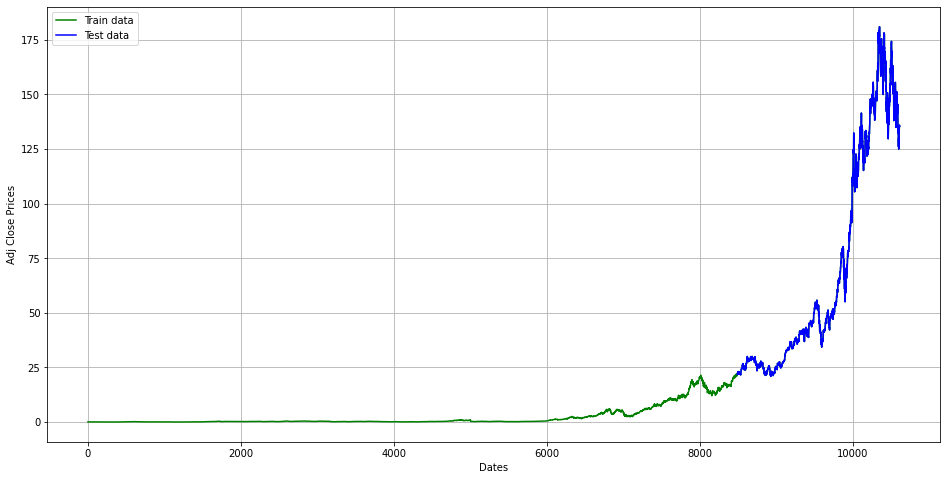

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Adj Close Prices')
plt.plot(df['Adj Close'], 'green', label='Train data')
plt.plot(test_data['Adj Close'], 'blue', label='Test data')
plt.legend()

In [ ]:
df.set_index(pd.DatetimeIndex(df['Date']), inplace=False)

,Date,Open,High,Low,Close,Adj Close,Volume,timestamp
Date,,,,,,,,
1980-12-15,15/12/1980,0.122210,0.122210,0.121652,0.121652,0.094663,175884800,1980-12-15 00:00:00+00:00
1980-12-16,16/12/1980,0.113281,0.113281,0.112723,0.112723,0.087715,105728000,1980-12-16 00:00:00+00:00
1980-12-17,17/12/1980,0.115513,0.116071,0.115513,0.115513,0.089886,86441600,1980-12-17 00:00:00+00:00
1980-12-18,18/12/1980,0.118862,0.119420,0.118862,0.118862,0.092492,73449600,1980-12-18 00:00:00+00:00
1980-12-19,19/12/1980,0.126116,0.126674,0.126116,0.126116,0.098137,48630400,1980-12-19 00:00:00+00:00
...,...,...,...,...,...,...,...,...
2023-12-01,12/01/2023,133.880005,134.259995,131.440002,133.410004,133.410004,71379600,2023-12-01 00:00:00+00:00
2023-01-13,13/01/2023,132.029999,134.919998,131.660004,134.759995,134.759995,57758000,2023-01-13 00:00:00+00:00
2023-01-17,17/01/2023,134.830002,137.289993,134.130005,135.940002,135.940002,63646600,2023-01-17 00:00:00+00:00


          t-1       t+1
t-1  1.000000  0.982287
t+1  0.982287  1.000000


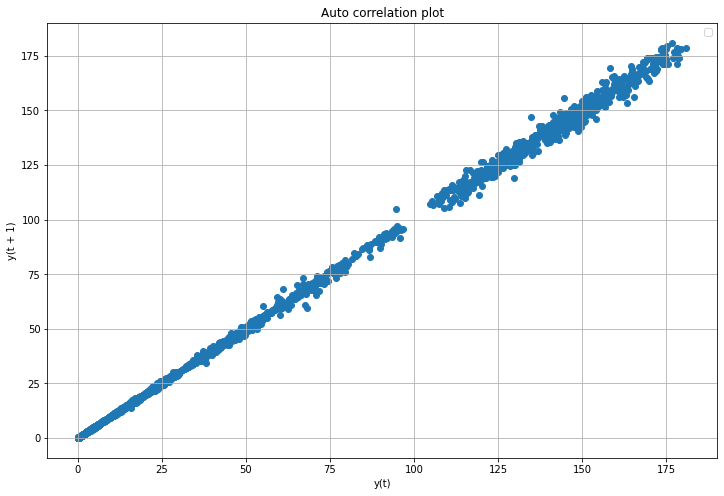

In [ ]:
from pandas.plotting import lag_plot
plt.figure(figsize=(12,8))
lag_plot(df['Adj Close'], lag=1)
plt.title('Auto correlation plot')
plt.grid(True)
plt.legend();

from pandas import DataFrame
from pandas import concat
values = DataFrame(df['Adj Close'].values)
dataframe = concat([values.shift(120), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

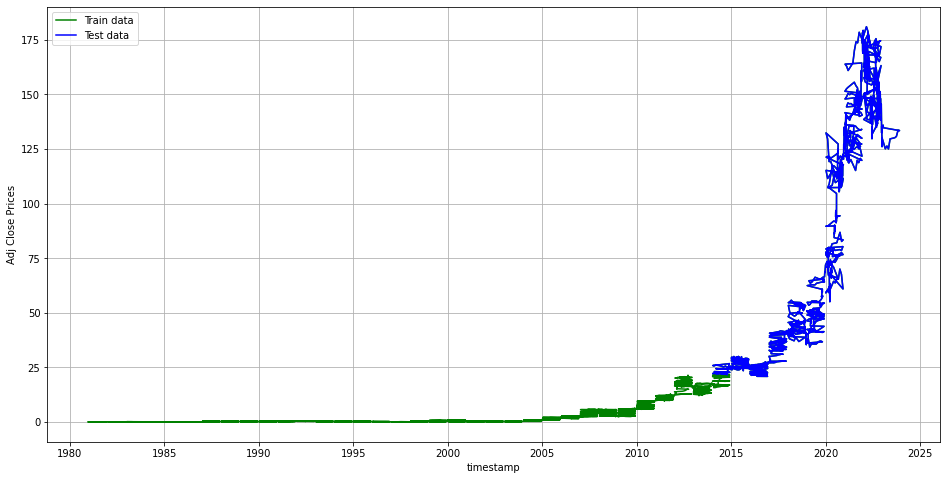

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('timestamp')
plt.ylabel('Adj Close Prices')
plt.plot(df['Adj Close'], 'green', label='Train data')
plt.plot(test_data['Adj Close'], 'blue', label='Test data')
plt.legend()

In [ ]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

train_ar = train_data['Adj Close']
test_ar = test_data['Adj Close']
# train autoregression
model = AR(train_ar)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train_ar[len(train_ar)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_ar)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test_ar[t]
    predictions.append(yhat)
    history.append(obs)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
/usr/lo

Lag: 36
MSE: 3.11204712389572
MAE: 1.0212570974751516
RMSE: 1.7640995221063125


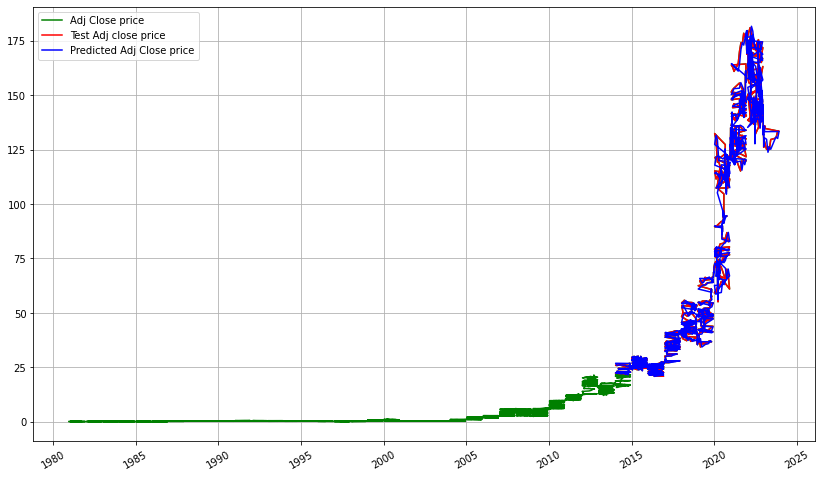

In [144]:
plt.figure(figsize=(14,8))
print('Lag: %s' % model_fit.k_ar)
plt.plot(df.index[-10614:], df['Adj Close'].tail(10614), color='green', label='Adj Close price')
plt.plot(test_data.index, test_data['Adj Close'], color='red', label='Test Adj close price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted Adj Close price')
plt.xticks(rotation=30)
plt.grid(True)
plt.legend()

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math
mse = mean_squared_error(test_data['Adj Close'], predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data['Adj Close'], predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data['Adj Close'], predictions))
print('RMSE: '+str(rmse))

plt.savefig('ar_model.pdf')

In [145]:
import numpy as np
mape = np.mean(np.abs(predictions - test_data['Adj Close']) / test_data['Adj Close'])
print("MAPE:", mape)

MAPE: 0.01338471974897247
